## **Sales Data Analysis**

### Resume

The online store has experienced fluctuating sales throughout 2023 and is seeking to better understand its customer behavior and product performance. While revenue appears stable, management has raised several concerns:

📉 Are some product categories underperforming despite high traffic?

👥 Which age groups and genders are the most frequent buyers?

📆 What months drive the most sales, and are there seasonal trends?

💸 Are there pricing or profitability differences across product types?

📦 Which products should be prioritized in marketing and inventory planning?

This analysis was conducted to answer these business questions through a comprehensive exploration of the sales data. The dataset includes transaction records with variables such as date, product category, quantity, price, customer age, and gender.

The goal is to deliver actionable insights that support strategic decisions in marketing, pricing, and product development.

### Dataset

#### Sales Dataset

Variables

-Date: The date the transaction occurred.

-Gender: The gender of the customer (e.g., Male or Female).

-Age: The age of the customer.

-Product Category: The category of the product purchased (e.g., Beauty, Clothing, Electronics).

-Quantity: The number of units purchased.

-Price per Unit: Price of a single unit of the product.

-Total Amount: Total amount spent for that transaction (Quantity × Price per Unit).

### Installing Required Libraries

In [363]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#### Importing Data

In [364]:
df=pd.read_csv('../dataset/raw/Sales Dataset.csv')
df.head()

,Unnamed: 0,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,0,2023-11-24,Male,34,Beauty,3,50,150
1,1,2023-02-27,Female,26,Clothing,2,500,1000
2,2,2023-01-13,Male,50,Electronics,1,30,30
3,3,2023-05-21,Male,37,Clothing,1,500,500
4,4,2023-05-06,Male,30,Beauty,2,50,100


Let's check the column names, the data type of each variable, and the size of the rows and columns.

In [365]:
df.columns

Index(['Unnamed: 0', 'Date', 'Gender', 'Age', 'Product Category', 'Quantity',
       'Price per Unit', 'Total Amount'],
      dtype='object')

In [366]:
df.dtypes

Unnamed: 0           int64
Date                object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [367]:
df.shape

(1000, 8)

#### Cleaning Data

drop column Unnamed: 0, because it is not useful 

In [368]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head()

,Date,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,2023-11-24,Male,34,Beauty,3,50,150
1,2023-02-27,Female,26,Clothing,2,500,1000
2,2023-01-13,Male,50,Electronics,1,30,30
3,2023-05-21,Male,37,Clothing,1,500,500
4,2023-05-06,Male,30,Beauty,2,50,100


Tranform the colummn Date to datetime

In [369]:
df['Date']=pd.to_datetime(df['Date'])
df.dtypes

Date                datetime64[ns]
Gender                      object
Age                          int64
Product Category            object
Quantity                     int64
Price per Unit               int64
Total Amount                 int64
dtype: object

In [370]:
df.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              1000 non-null   datetime64[ns]
 1   Gender            1000 non-null   object        
 2   Age               1000 non-null   int64         
 3   Product Category  1000 non-null   object        
 4   Quantity          1000 non-null   int64         
 5   Price per Unit    1000 non-null   int64         
 6   Total Amount      1000 non-null   int64         
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 148.0 KB


Here we can see that the dataframe uses 163.6 kb of memory

Here we can see that there is no missing data in the data frame.

### Optimizing data

Convert columns to smaller types

In [371]:
df['Age']=df['Age'].astype('int8')
df['Quantity']=df['Quantity'].astype('int8')
df['Price per Unit']=df['Price per Unit'].astype('float32')
df['Total Amount']=df['Total Amount'].astype('float32')

Getting dummy variables

In [372]:
dummy_variables=pd.get_dummies(df['Gender'])
df=pd.concat([df,dummy_variables], axis=1)
df.drop(columns=['Gender'], inplace=True)

Change index

In [373]:
#df.set_index('Date', inplace=True)
df.set_index('Date', inplace=True)
df 

,Age,Product Category,Quantity,Price per Unit,Total Amount,Female,Male
Date,,,,,,,
2023-11-24,34,Beauty,3,50.0,150.0,False,True
2023-02-27,26,Clothing,2,500.0,1000.0,True,False
2023-01-13,50,Electronics,1,30.0,30.0,False,True
2023-05-21,37,Clothing,1,500.0,500.0,False,True
2023-05-06,30,Beauty,2,50.0,100.0,False,True
...,...,...,...,...,...,...,...
2023-05-16,62,Clothing,1,50.0,50.0,False,True
2023-11-17,52,Beauty,3,30.0,90.0,False,True
2023-10-29,23,Beauty,4,25.0,100.0,True,False


In [374]:
df.info(memory_usage='deep')
#saving data
df.to_csv("../dataset/processed/Sales Data(Cleaned).csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1000 entries, 2023-11-24 to 2023-04-12
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Age               1000 non-null   int8   
 1   Product Category  1000 non-null   object 
 2   Quantity          1000 non-null   int8   
 3   Price per Unit    1000 non-null   float32
 4   Total Amount      1000 non-null   float32
 5   Female            1000 non-null   bool   
 6   Male              1000 non-null   bool   
dtypes: bool(2), float32(2), int8(2), object(1)
memory usage: 75.6 KB


If we check the memory used again, we can see that it was reduced to 83.4 kb, which is a 49% reduction in memory.

### Display of data

The best way to do this analysis is to focus on one year.

In [375]:
#I going to use this dataframe for all notebook
df_2023=df[df.index.year==2023].copy()


Display a barplot with the total the product sales in the Online Store

#### Total of sales by product category 

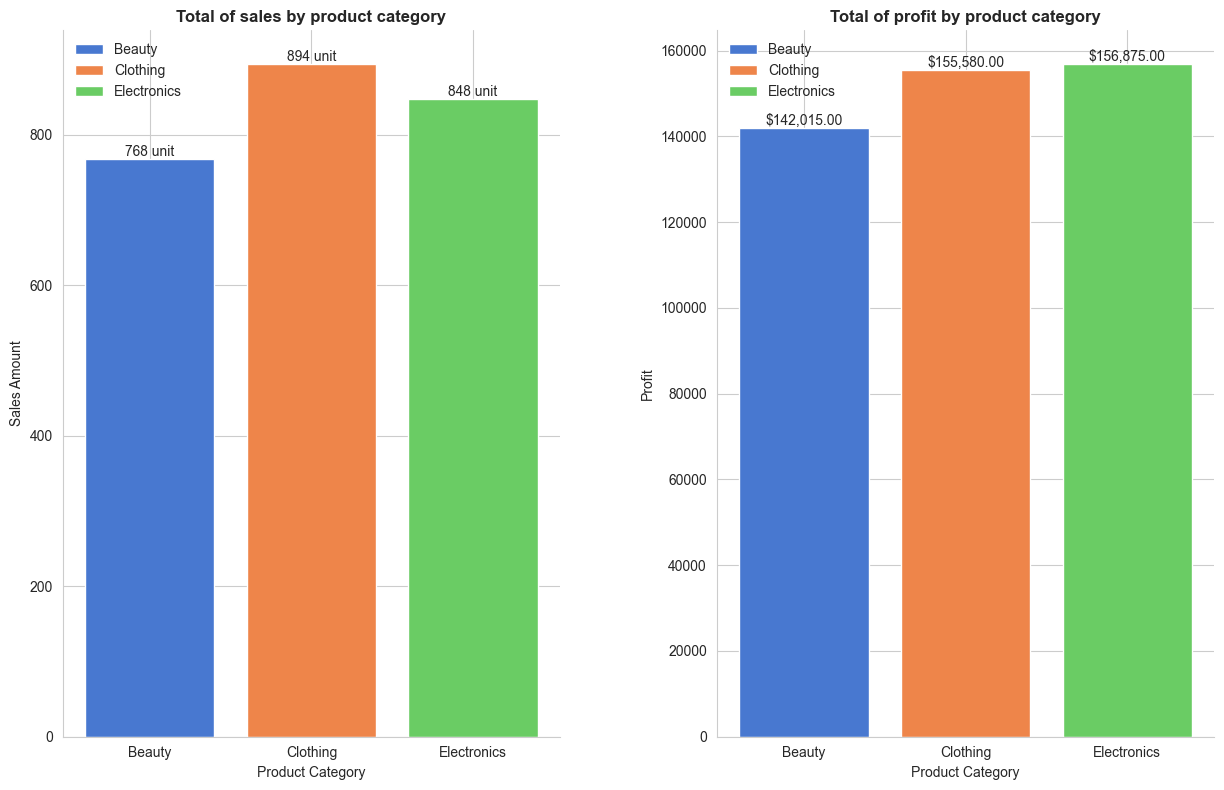

In [376]:
#group sales by category type
df_sales=df_2023[["Product Category", 'Quantity','Total Amount']].groupby("Product Category").sum().reset_index()
fig, ax =plt.subplots(1, 2,figsize=(13, 8))
#adding style
colors = sns.color_palette("muted", n_colors=len(df_sales['Product Category'].unique()))
list_data=[
    {
        'col_y':'Quantity',
        'title':'Total of sales by product category',
        'label_y': 'Sales Amount'
    },
        {
        'col_y':'Total Amount',
        'title':'Total of profit by product category',
        'label_y': 'Profit'
    }
]
sns.set_style("whitegrid")
for index, values in enumerate(list_data):
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    #bar plot
    bar=ax[index].bar(df_sales['Product Category'],df_sales[values['col_y']],color=colors, label=df_sales['Product Category'])
    
    #setting labels and some data for better read
    ax[index].set_title(values['title'], fontsize=12,fontweight='bold')
    ax[index].set_xlabel("Product Category")
    ax[index].set_ylabel(values['label_y'])
    ax[index].legend(loc='upper left',fontsize=10, title_fontsize=11, frameon=False)
    #style for bar value name
    if values['label_y']=='Profit':
        labels = [f"${v:,.2f}" for v in df_sales['Total Amount']]
    else:
        labels = [f"{v} unit" for v in df_sales['Quantity']]
    ax[index].bar_label(bar,labels=labels)


#Increase horizontal space between subplots
plt.subplots_adjust(wspace=15)

plt.tight_layout()
plt.show()

The bar charts summarize the total number of units sold and total revenue by product category during 2023.

The Clothing category clearly leads in sales volume, with 894 units sold, highlighting its strong demand. However, when focusing on revenue, Electronics slightly outperforms all other categories with $156,875, despite having fewer units sold than Apparel.

This indicates that while Apparel drives volume, Electronics can generate higher revenue per unit, making it a key category for profitability. **This data can help guide strategic decisions regarding pricing, inventory management, and marketing investments, based on both sales performance and financial impact.**

#### Trading of Sales in a 2023 

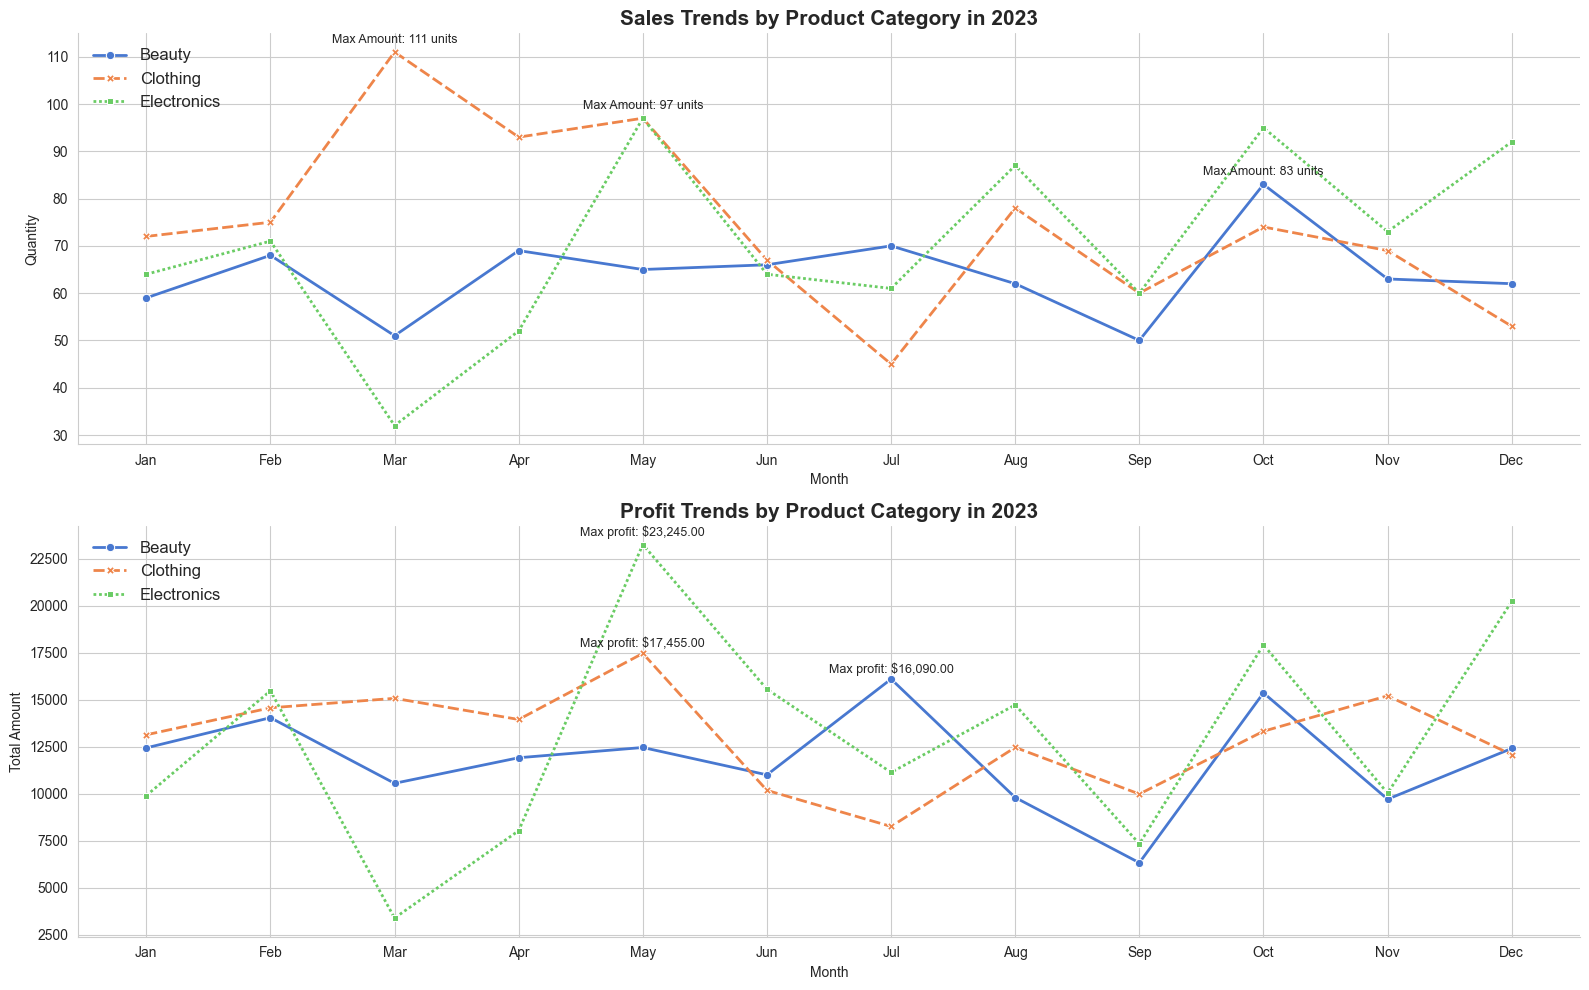

In [377]:
#Collecting the months
df_2023_copy=df_2023.copy()
df_2023_copy['Month']=df_2023_copy.index.month
df_2023_copy.reset_index(inplace=True)
df_2023_copy.drop(columns='Date', inplace=True)
#Grouping sales by month and product type
df_2023_copy=df_2023_copy[['Month','Product Category', 'Quantity', 'Total Amount']].groupby(['Month', 'Product Category']).sum().reset_index()
df_2023_copy['Month']=pd.to_datetime(df_2023_copy['Month'], format='%m').dt.strftime('%b')
#colors
colors=sns.color_palette('muted', n_colors=len(df_2023_copy['Product Category'].unique()))
fig, ax = plt.subplots(2,1,figsize=(16,10))
list_data=[
    {
    'y':'Quantity',
    'title':"Sales Trends by Product Category in 2023",
    },
    {
    'y':'Total Amount',
    'title':"Profit Trends by Product Category in 2023"
    }
]
for index, values in enumerate(list_data):
    #Line plot
    sns.lineplot(data=df_2023_copy, x='Month', y=values['y'], hue='Product Category', style='Product Category', markers=True, palette=colors, linewidth=2, ax=ax[index], errorbar=None)
    #set title
    ax[index].set_title(values['title'], fontsize=15, fontweight='bold')
    #highlighting the greatest values ​​of each product
    for product in df_2023_copy['Product Category'].unique():
        #a dataframe with a single product category
        sub = df_2023_copy[df_2023_copy['Product Category'] == product]
        #dataframe with max value en column "Quantity" or "Total Amount"
        df_max=sub[sub[values['y']]==max(sub[values['y']])]
      
        x=df_max['Month'].values[0]
        y=df_max[values['y']].values[0]
       
        if values['y']=='Total Amount':
            label=f"Max profit: ${y:,.2f}"
            offset=y*.02#offset de 2%
        else:
            label=f"Max Amount: {y} units"
            offset=2
        ax[index].text(x, y+offset ,label, ha='center', fontsize=9)
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    ax[index].legend(loc='upper left',fontsize=12, title_fontsize=11, frameon=False)

plt.tight_layout()
plt.show()




Apparel saw its highest unit sales in March (111), while electronics peaked in May with strong performance in both units sold (97) and profit ($23,245).
Beauty saw its highest sales in October and its highest profit in July ($16,090).

These trends suggest seasonal demand patterns and highlight electronics as the most profitable category, especially in May, providing valuable insights for inventory and marketing decisions.

## Who gender did buy more?

We lost the Gender column when finding the categorical variables, but now we need that data in a single column. The most practical thing would be to use a copy of the original data frame to recreate the column.

In [378]:
df_2023['Gender']=df_2023['Female'].apply(lambda x:  'Female' if x else 'Male')
df_2023['Gender']

Date
2023-11-24      Male
2023-02-27    Female
2023-01-13      Male
2023-05-21      Male
2023-05-06      Male
               ...  
2023-05-16      Male
2023-11-17      Male
2023-10-29    Female
2023-12-05    Female
2023-04-12      Male
Name: Gender, Length: 998, dtype: object

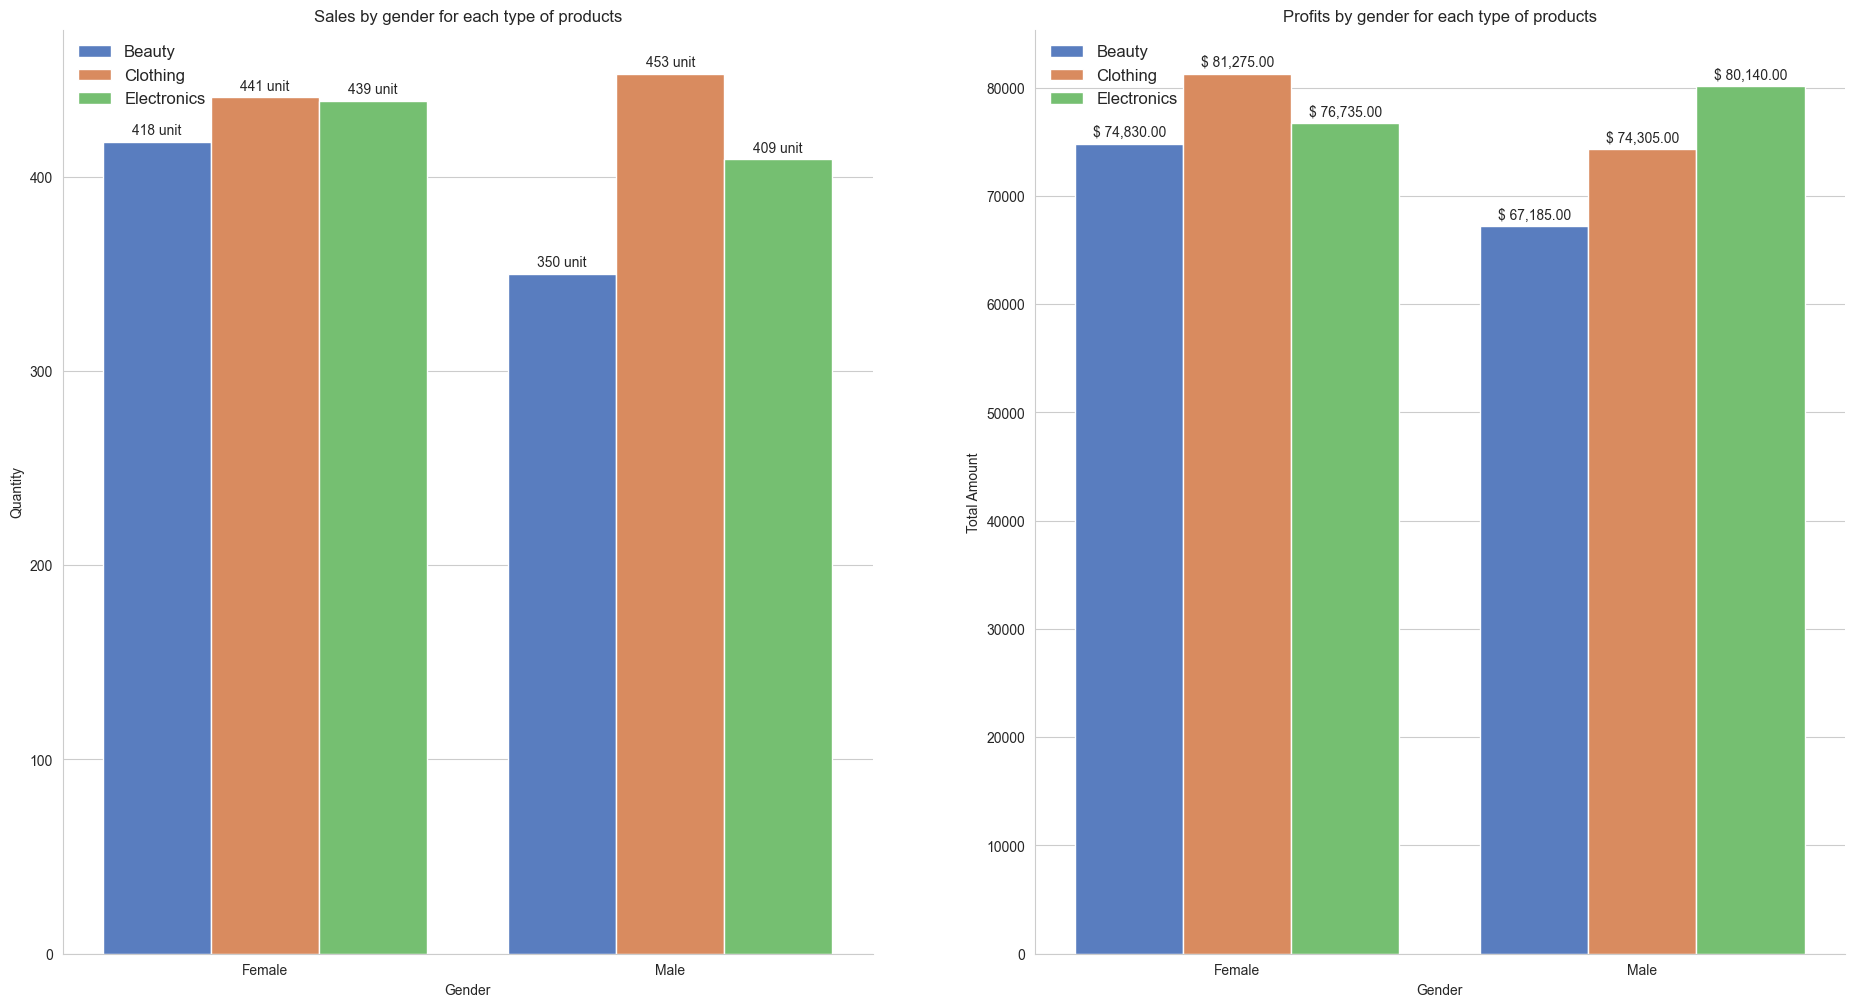

In [ ]:
#Grouping the data for the graph
df_gp_copy=df_2023 [['Gender','Total Amount', 'Quantity', 'Product Category']].groupby(['Product Category', 'Gender']).sum().reset_index()
fig, ax=plt.subplots(1,2,figsize=(23,12))
colors=sns.color_palette('muted', n_colors=len(df_gp_copy['Product Category'].unique()))
list_data=[
    {
        'y':'Quantity',
        'title':'Sales by gender for each type of products'
    },
    {
        'y':'Total Amount',
        'title':'Profits by gender for each type of products'
    }
]
for index, barplot in enumerate(list_data):
    sns.barplot(x='Gender', y=barplot['y'], data=df_gp_copy, hue='Product Category', ax=ax[index], palette=colors)
    #setting styles
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    #container has label for each bar
    if barplot['y']=='Quantity':
        label="%.0f unit"
    else:
        label="$ {:,.2f}"
    for bar in ax[index].containers:
        ax[index].bar_label(bar,fmt=label, padding=3)
    ax[index].set_title(barplot['title'])
    ax[index].legend(loc='upper left', fontsize=12, title_fontsize=11, frameon=False)
plt.show()



In the quantity barplot, we can see that clothing products are the most sold items for both genders. It is also noticeable that women purchase electronics almost as much as clothing, which is a valuable insight.

In the revenue chart, it's clear that women spend more on clothing than on any other category. For men, the highest spending is on electronics, coming close to the amount women spend on clothing.

In conclusion, women are our most valuable customer segment, generating a total of $232,840.00 in revenue, with 34.89% of that amount spent on clothing alone.

**Recommendation:**
It is advisable to expand the clothing selection for both women and men, given its high sales volume, and to enhance the electronics offerings targeted at men, as this category provides strong profit potential for the store.

## How old the best clients? (cambiar grafico por uno que meustre 3 rngos de edades)

Index(['Age', 'Product Category', 'Quantity', 'Price per Unit', 'Total Amount',
       'Female', 'Male', 'Gender'],
      dtype='object')


C:\Users\SHIro\AppData\Local\Temp\ipykernel_4100\3352616278.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='AgeGroup', data=df_2023,palette=colors)
C:\Users\SHIro\AppData\Local\Temp\ipykernel_4100\3352616278.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend(frameon=False, loc='upper left')


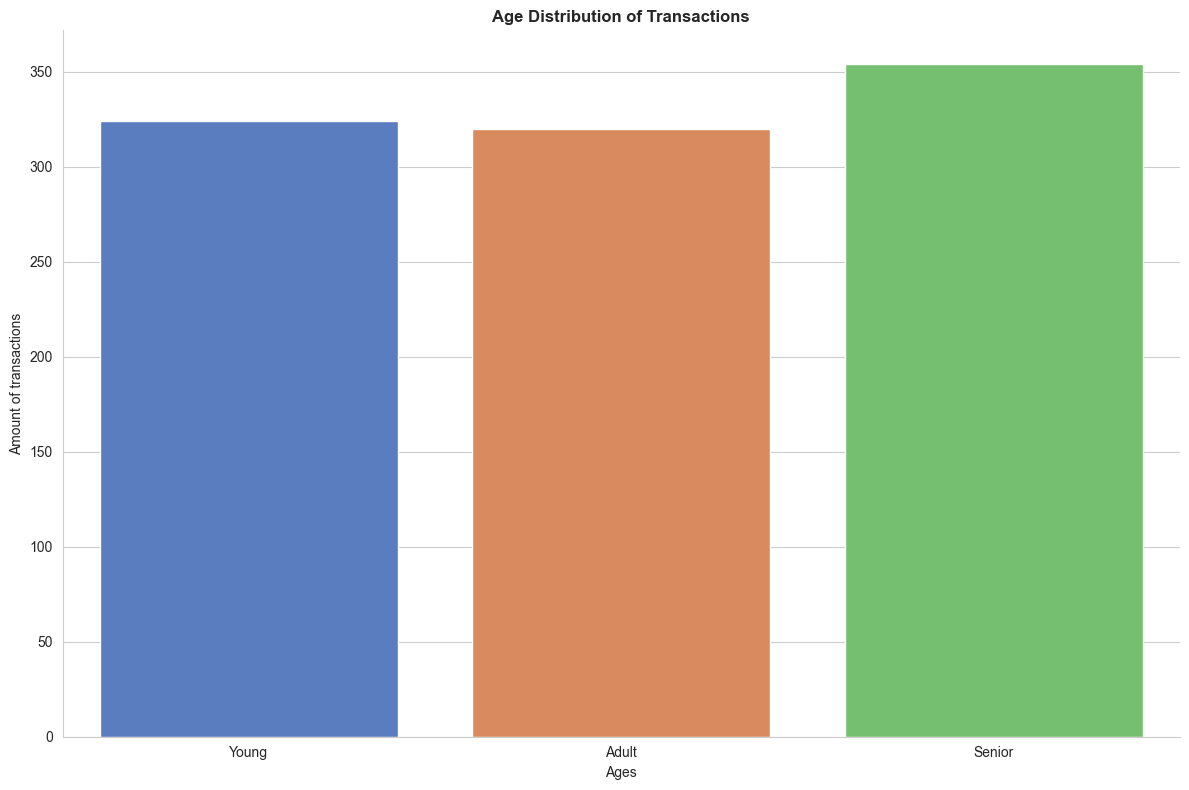

In [380]:
fig, ax=plt.subplots(figsize=(12,8))
colors=sns.color_palette('muted', n_colors=3)
# transaction frequency, age range & bars
print(df_2023.columns)
bins=np.linspace(df_2023['Age'].min(), df_2023['Age'].max(), num=4)
label=['Young', 'Adult', 'Senior']
df_2023['AgeGroup']=pd.cut(df_2023['Age'], bins=bins, labels=label, include_lowest=True)
sns.countplot(x='AgeGroup', data=df_2023,palette=colors)
#setting axes
ax.set_title("Age Distribution of Transactions", fontsize=12, fontweight='bold')
ax.set_xlabel('Ages')
ax.set_ylabel("Amount of transactions")




#some styles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, loc='upper left')

plt.tight_layout()

plt.show()

NameError: name 'df_copy' is not defined

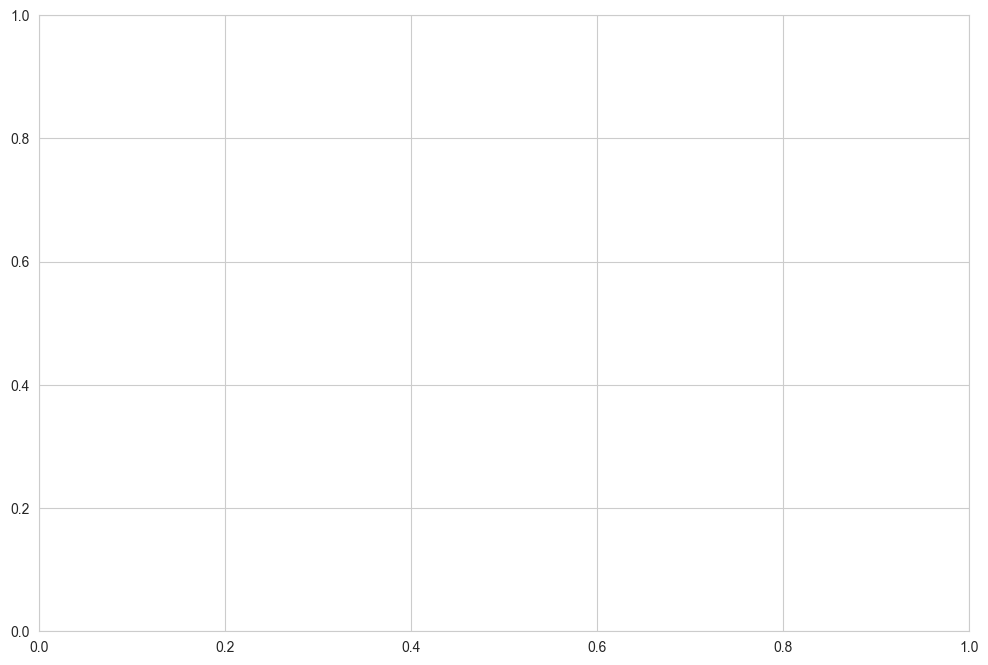

In [381]:
fig, ax=plt.subplots(figsize=(12,8))
colors=sns.color_palette('muted', n_colors=2)
# transaction frequency, age range & bars
frequency, bins_edge, bars = ax.hist(df_copy['Age'], color=colors[0])
#setting axes
ax.set_title("Age Distribution of Transactions", fontsize=12, fontweight='bold')
ax.set_xlabel('Ages')
ax.set_ylabel("Amount of transactions")
ax.set_xticks(list(map(int,bins_edge)))
ax.bar_label(bars)
#Color of the ages that most purchases
top_idx = np.argsort(frequency)
bars[top_idx[-1]].set_facecolor(colors[1])#top 1
bars[top_idx[-2]].set_facecolor(colors[1])#top 2
bars[top_idx[-3]].set_facecolor(colors[1])#top 3
bars[top_idx[-1]].set_label("Most frequent age group")

#some styles
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(frameon=False, loc='upper left')
plt.tight_layout()

plt.show()

print(df_copy['Age'].value_counts().reset_index())

The histogram reveals that the highest concentration of transactions comes from customers aged 59–64, followed closely by those in the 45–50 and 18–22 age ranges. This indicates that the store appeals to both older adults and younger customers, suggesting a diverse customer base with purchasing activity concentrated in these three key demographic segments. These insights could help guide targeted marketing strategies, product selection, or age-specific promotions to maximize engagement and sales.

In [ ]:
#add un grafico que muestre las que comprarion q compraron en el rango de 18-22

In [ ]:
#boxplot de gener x quantity and gender x Total Amount

<function matplotlib.pyplot.show(close=None, block=None)>

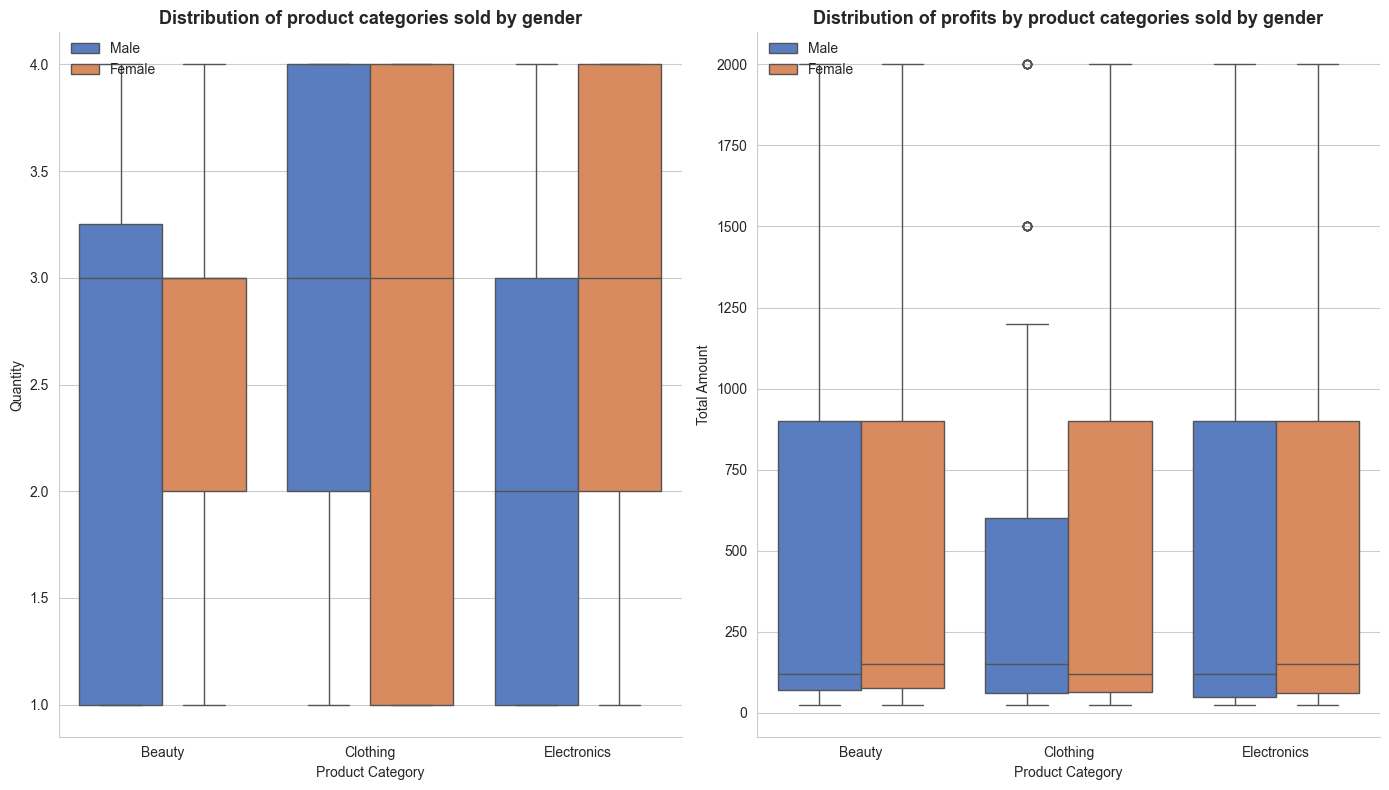

In [ ]:
df_copy=df[df.index.year==2023].copy()
df_copy['Gender']=df_copy['Female'].apply(lambda x:  'Female' if x else 'Male')

fig, ax=plt.subplots(1,2,figsize=(14,8))
colors=sns.color_palette('muted', n_colors=2)
list_data=[
    {
        'y':'Quantity',
        'title':'Distribution of product categories sold by gender'
    },
    {
        'y':'Total Amount',
        'title':'Distribution of profits by product categories sold by gender'
    }
]
for index, box in enumerate(list_data):
    sns.boxplot(x='Product Category', y=box['y'], data=df_copy, palette=colors, hue='Gender', ax=ax[index])
    ax[index].set_title(box['title'], fontweight='bold', fontsize=13)
    ax[index].spines['top'].set_visible(False)
    ax[index].spines['right'].set_visible(False)
    ax[index].legend(loc='upper left', frameon=False, bbox_to_anchor=(0,1.004))


plt.tight_layout()
plt.show




In the *Beauty* category, male customers show greater variability in both the quantity of products purchased and the profits generated, suggesting less consistent buying behavior but potentially more profitable transactions. In *Clothing*, although both genders purchase similar quantities, female customers exhibit a wider range in their purchases and generate higher revenues, including some exceptionally high-value transactions. Finally, *Electronics* displays very similar purchasing behavior between men and women in terms of quantity and total amount spent, making it a stable and predictable category. These insights help identify key differences in consumer habits and support more targeted business strategies based on product category and customer gender.

In [ ]:
#add Heatmap
